In [2]:
import pandas as pd
import glob

path = 'C:/Users/nanay/Documents/Màster/capstone/ub_capstone_data/'
df_chunks = []
for file in glob.glob(path + "/*.csv"):
    chunk = pd.read_csv(file)
    df_chunks.append(chunk)
df = pd.concat(df_chunks)

path = 'C:/Users/nanay/Documents/Màster/capstone/ub_capstone_informacio/'
df_informacio_chunks = []
for file in glob.glob(path + "/*.csv"):
    chunk = pd.read_csv(file, encoding='latin-1')
    columns_to_drop = chunk.columns[9:] 
    chunk = chunk.drop(columns=columns_to_drop)
    file_name = file.split('/')[-1]
    file_name = file_name.split('informacio')[-1]
    file_components = file_name.split('_')
    year = file_components[0].lstrip('\\')
    month = int(file_components[1])
    chunk['year'] = year
    chunk['month'] = month
    df_informacio_chunks.append(chunk)
df_informacio = pd.concat(df_informacio_chunks)

df_informacio.drop_duplicates(inplace=True)

merged_chunks = []
chunk_size = 10000
for i in range(0, len(df), chunk_size):
    df_chunk = df.iloc[i:i+chunk_size]
    df_informacio_chunk = df_informacio.iloc[i:i+chunk_size]
    merged_chunk = pd.merge(df_chunk, df_informacio_chunk, on=['station_id', 'year', 'month'], how='left')
    merged_chunks.append(merged_chunk)

merged_df = pd.concat(merged_chunks)
merged_df.to_csv('merged_df.csv', index=False)


C:\Users\nanay\AppData\Local\Temp\ipykernel_3556\543613057.py:16: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(file, encoding='latin-1')
C:\Users\nanay\AppData\Local\Temp\ipykernel_3556\543613057.py:16: DtypeWarning: Columns (7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(file, encoding='latin-1')
C:\Users\nanay\AppData\Local\Temp\ipykernel_3556\543613057.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(file, encoding='latin-1')


In [47]:
df.columns

Index(['Unnamed: 0', 'station_id', 'last_updated_hour', 'year', 'month', 'day',
       'hour', 'num_bikes_available', 'num_bikes_available_types.mechanical',
       'num_bikes_available_types.ebike', 'num_docks_available',
       'station_id_informacio', 'name', 'physical_configuration', 'lat', 'lon',
       'altitude', 'address', 'post_code', 'capacity'],
      dtype='object')

In [48]:
del(df)
del(df_informacio)

In [4]:
import pandas as pd
import glob
path = 'C:/Users/nanay/Documents/Màster/capstone/festivos/'
df_festivos = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))
df_festivos.head()


,Any,Ambit,Titularitat,Tipus,Edicio,Festa,DataInici,DataFi,Assistents,Espai,Organitzador,Nota
0,2019,Festes i tradicions,Municipal,Festes,NaN,Cap d'Any,31/12/2019,31/12/2019,94000.0,NaN,Institut de Cultura. Ajuntament de Barcelona,NaN
1,2019,Festes i tradicions,Mixta,Festes,NaN,Carnaval,28/2/2019,6/3/2019,NaN,Diferents espais de la ciutat,Diverses entitats,NaN
2,2019,Festes i tradicions,Municipal,Festes,NaN,Cavalcada de Reis,5/1/2019,5/1/2019,750000.0,Diversos espais,Institut de Cultura. Ajuntament de Barcelona,NaN
3,2019,Festes i tradicions,Mixta,Festes,NaN,Cavalcada dels Tres Tombs,17/1/2019,17/1/2019,NaN,Barri de Sant Antoni,Diverses entitats,NaN
4,2019,Festes i tradicions,Mixta,Festes,NaN,Diada de l'Onze de Setembre,11/9/2019,11/9/2019,NaN,NaN,Diverses entitats,NaN


In [5]:
#festivos preprocessing


df_festivos = df_festivos[df_festivos['Nota'] != 'Online']
df_festivos['DataInici'] = pd.to_datetime(df_festivos['DataInici'])
df_festivos['DataFi'] = pd.to_datetime(df_festivos['DataFi'])
df_festivos['DataInici'] = df_festivos['DataInici'].dt.strftime('%Y-%m-%d')
df_festivos['DataFi'] = df_festivos['DataFi'].dt.strftime('%Y-%m-%d')

result = pd.DataFrame(columns=df_festivos.columns)

for _, row in df_festivos.iterrows():
    date_range = pd.date_range(start=row['DataInici'], end=row['DataFi'], inclusive='left') #genera el data range
    date_df = pd.DataFrame({'date': date_range})  
    replicated_row = pd.concat([pd.DataFrame([row.values[:]] * len(date_df), columns=df_festivos.columns[:])], ignore_index=True)
    merged_df = pd.concat([date_df, replicated_row], axis=1)
    merged_df.reset_index(drop=True, inplace=True)  # Reset the index
    result = result.append(merged_df, ignore_index=True)

df_festivos = result



C:\Users\nanay\AppData\Local\Temp\ipykernel_7680\748301394.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_festivos['DataInici'] = pd.to_datetime(df_festivos['DataInici'])
C:\Users\nanay\AppData\Local\Temp\ipykernel_7680\748301394.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_festivos['DataFi'] = pd.to_datetime(df_festivos['DataFi'])
C:\Users\nanay\AppData\Local\Temp\ipykernel_7680\748301394.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(merged_df, ignore_index=True)
C:\Users\nanay\AppData\Local\Temp\ipykernel_7680\748301394.py:18: FutureWarning: The frame.append meth

In [3]:
import pandas as pd
import glob
df = pd.read_csv('merged_df.csv')
df['date'] = pd.to_datetime(df['last_updated_hour']).dt.date
df_festivos['date'] = pd.to_datetime(df_festivos['date']).dt.date.astype(str)
df['date'] = pd.to_datetime(df['last_updated_hour']).dt.date.astype(str)


C:\Users\nanay\AppData\Local\Temp\ipykernel_7680\716992328.py:3: DtypeWarning: Columns (11,12,16,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_df.csv')


NameError: name 'df_festivos' is not defined

In [1]:
merged_chunks = []
chunk_size = 10000
for i in range(0, len(df), chunk_size):
    df_chunk = df.iloc[i:i+chunk_size]
    df_festivos_chunk = df_festivos.iloc[i:i+chunk_size]
    merged_chunk = pd.merge(df_chunk, df_festivos_chunk, on='date', how='left')
    merged_chunks.append(merged_chunk)

df = pd.concat(merged_chunks)



NameError: name 'df' is not defined

In [66]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'station_id', 'last_updated_hour', 'year',
       'month', 'day', 'hour', 'num_bikes_available',
       'num_bikes_available_types.mechanical',
       'num_bikes_available_types.ebike', 'num_docks_available',
       'station_id_informacio', 'name', 'physical_configuration', 'lat', 'lon',
       'altitude', 'address', 'post_code', 'capacity', 'date', 'Any', 'Ambit',
       'Titularitat', 'Tipus', 'Edicio', 'Festa', 'DataInici', 'DataFi',
       'Assistents', 'Espai', 'Organitzador', 'Nota'],
      dtype='object')

In [67]:
#df preprocessing
df['date'] = pd.to_datetime(df['last_updated_hour']).dt.date
df['Holiday'] = df['DataInici'].notnull().astype(bool)
df['total bikes'] = df['num_bikes_available'] + df['num_docks_available'] 
df['percentatge'] = (df['num_bikes_available'] /  df['total bikes'])
df = df[df['percentatge'] <= 1]
df['last_updated_hour'] = pd.to_datetime(df['last_updated_hour'])
df['day of the week'] = df['last_updated_hour'].dt.day_name()


First assesment of the data:

Text(0.5, 0.98, 'Number of bikes available by month (%)')

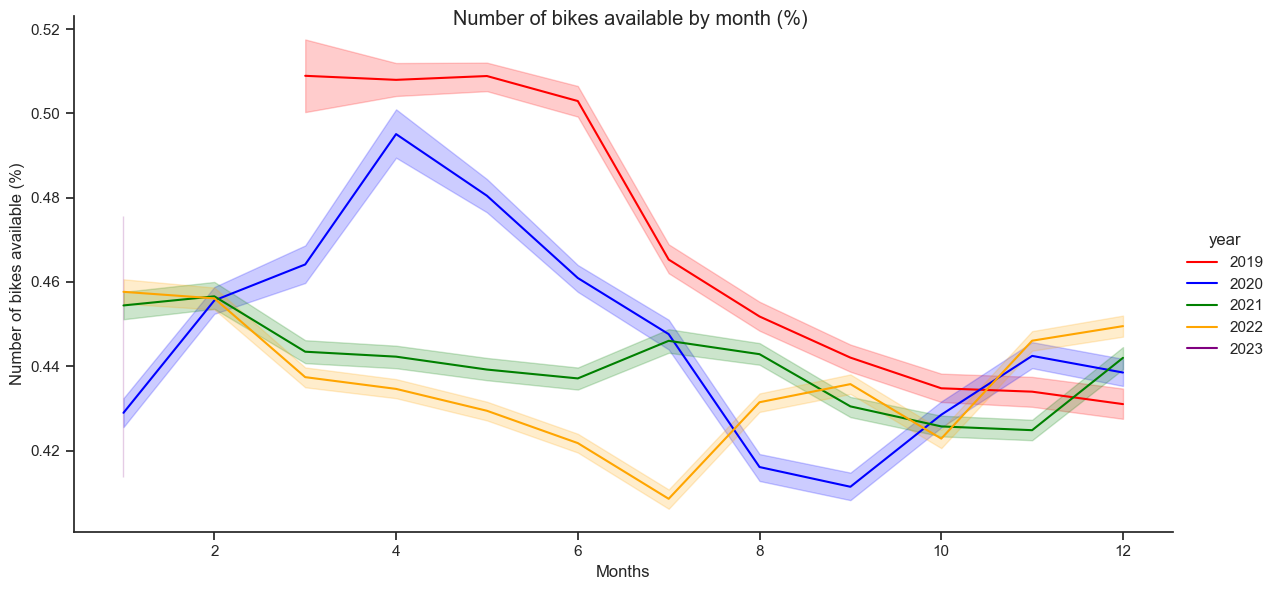

In [68]:
import seaborn as sns
bike_counts= df.value_counts(subset=['month','year','percentatge']).rename('count').reset_index()
c = ['red','blue','green','orange','purple']
g = sns.FacetGrid(bike_counts, hue='year', sharey=False, height= 6, palette=c, aspect= 2)
g.map_dataframe(sns.lineplot,x='month', y= 'percentatge').add_legend()
g.set_axis_labels('Months','Number of bikes available (%)')
g.fig.suptitle('Number of bikes available by month (%)')

As expected, the tendency for 2020 is not similar to the other due to Covid-19. 
In this case, due to the isolation, the percentatge of bikes available were in all time high, compared to the other years.

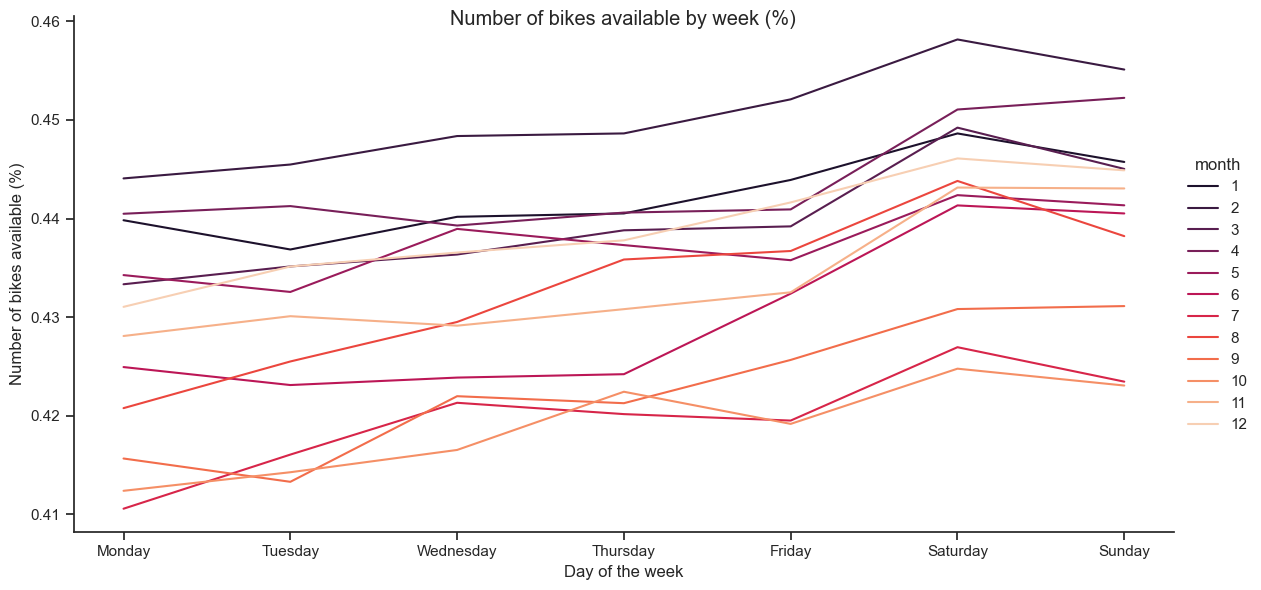

In [69]:
import seaborn as sns
import matplotlib
import calendar
day_order = list(calendar.day_name)
df['day of the week'] = pd.Categorical(df['day of the week'], categories=day_order, ordered=True)
bike_counts = df.value_counts(subset=['month', 'day of the week', 'percentatge']).rename('count').reset_index()
c = ['red', 'blue', 'green', 'orange', 'purple']
g = sns.FacetGrid(bike_counts, hue='month', sharey=False, height=6, palette="rocket", aspect=2)
g.map_dataframe(sns.lineplot, x='day of the week', y='percentatge', errorbar=None)
g.set_axis_labels('Day of the week', 'Number of bikes available (%)')
g.fig.suptitle('Number of bikes available by week (%)')
g.add_legend()



With this plot, we can see that the bike availability is low on weekdays, and increases as the week finishes

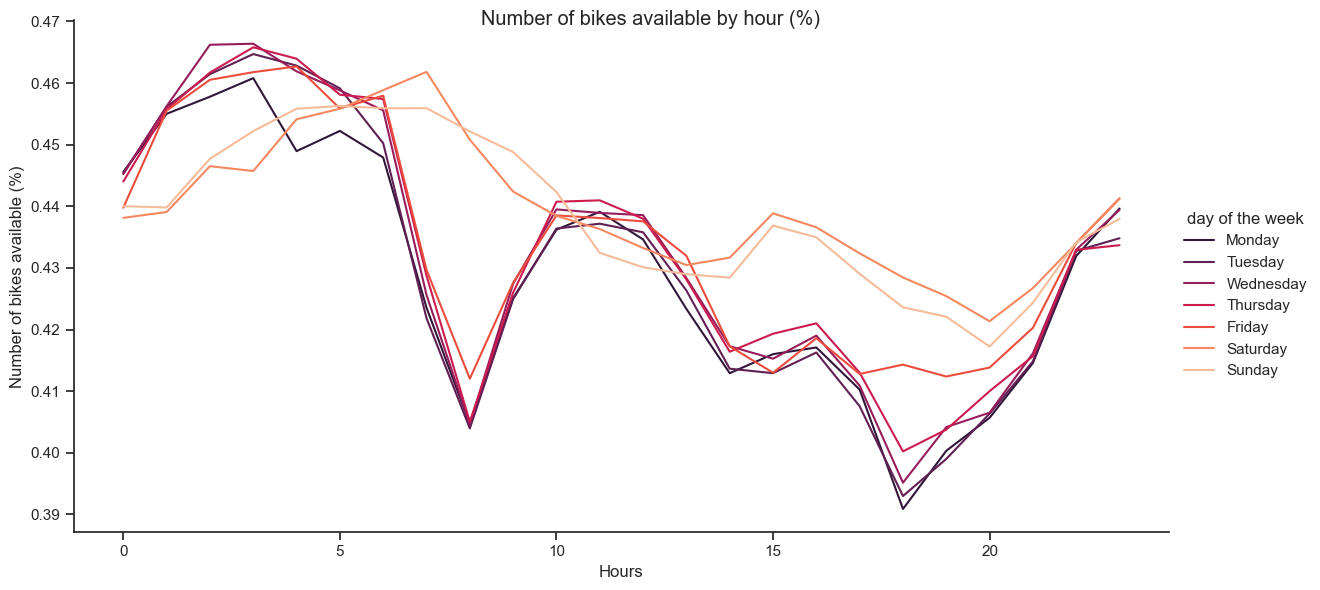

In [70]:
import matplotlib.pyplot as plt
bike_counts = df.value_counts(subset=['hour', 'day of the week', 'percentatge']).rename('count').reset_index()
c = ['red', 'blue', 'green', 'orange', 'purple']
g = sns.FacetGrid(bike_counts, hue='day of the week', sharey=False, height=6, palette="rocket", aspect=2)
g.map_dataframe(sns.lineplot, x='hour', y='percentatge', errorbar=None)
g.set_axis_labels('Hours', 'Number of bikes available (%)')
g.fig.suptitle('Number of bikes available by hour (%)')
g.add_legend()
plt.show()

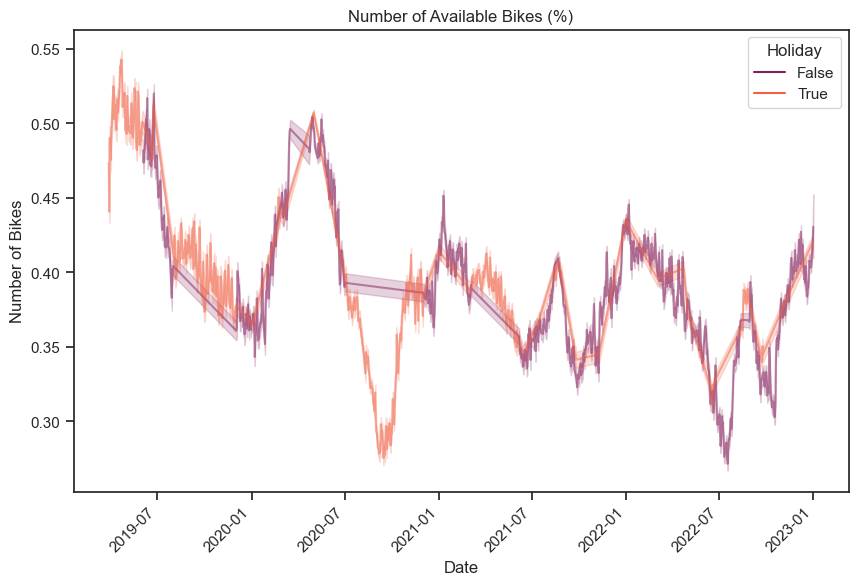

In [60]:
#Correlation between holidays and number of bikes available
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
plt.figure(figsize=(10, 6))
sns.set(style='ticks')
sns.lineplot(x='date', y='percentatge', hue='Holiday', data=df, alpha=0.5, palette="rocket")
plt.xticks(rotation=45, ha='right')
plt.title('Number of Available Bikes (%)')
plt.xlabel('Date')
plt.ylabel('Number of Bikes')
plt.show()


C:\Users\nanay\AppData\Local\Temp\ipykernel_14512\3491001394.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\nanay\OneDrive\Documentos\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


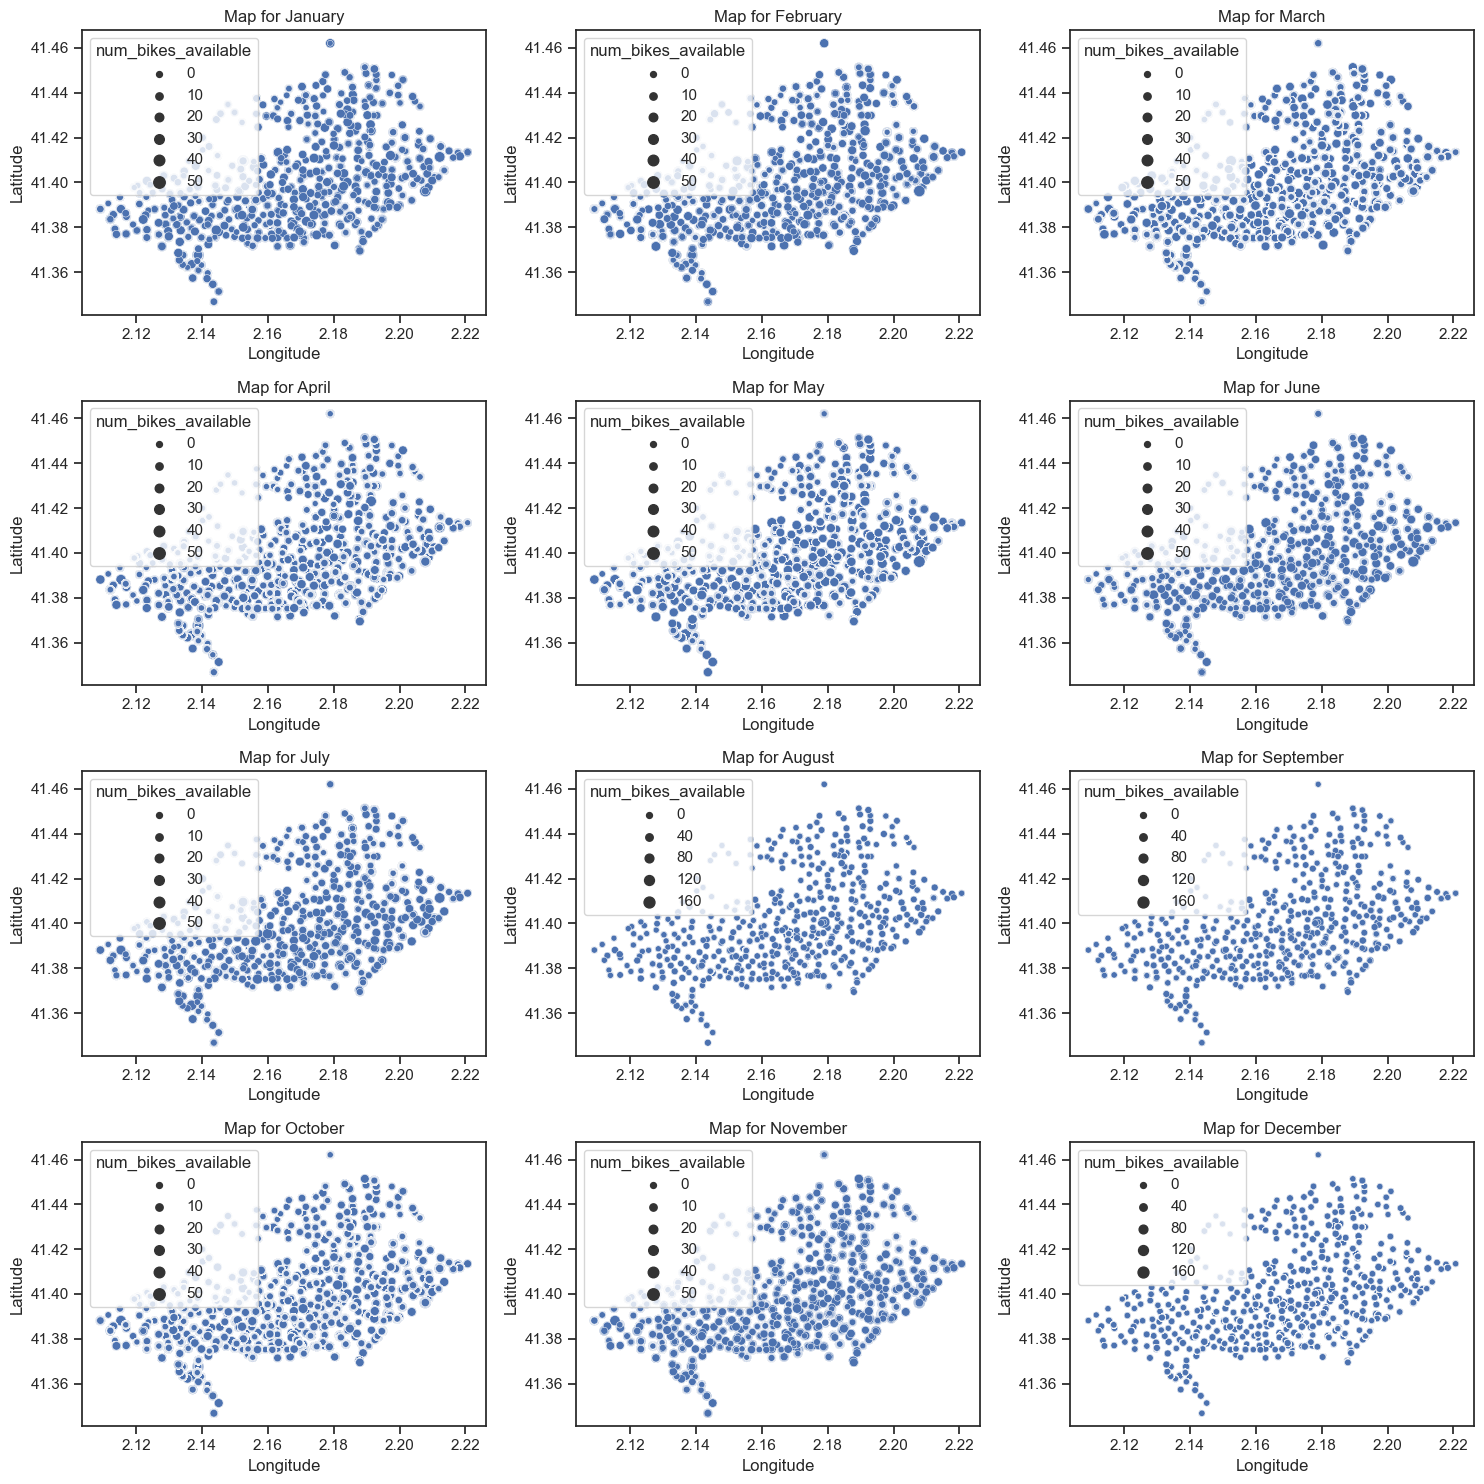

In [61]:

n_rows = 4
n_cols = 3


df['month_name'] = pd.to_datetime(df['month'], format='%m').dt.strftime('%B')


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))


axes = axes.flatten()

for i, month in enumerate(sorted(df['month'].unique())):

    df_month = df[df['month'] == month]
    month_name = df_month['month_name'].iloc[0]  # Get the month name for the current month
    sns.scatterplot(x='lon', y='lat', size='num_bikes_available', data=df_month, ax=axes[i])
    axes[i].set_title(f'Map for {month_name}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')

if len(df['month'].unique()) < n_rows * n_cols:
    for j in range(len(df['month'].unique()), n_rows * n_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.show()